<a href="https://colab.research.google.com/github/mmenuu/mmenuu/blob/main/MNIST_BasicAI001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

### **นำเข้าข้อมูล (Load Dataset)**  : 

---
ใช้ข้อมูล 'Load_digits' จากไลบรารี sklearn



In [25]:
from sklearn import datasets
digits= datasets.load_digits()


**เก็บข้อมูลไว้ในตัวแปร** :

*   x = Feature
*   y = Target




In [26]:
x=digits.data
y=digits.target

**ตรวจสอบข้อมูลใน Feature&Target**

In [27]:
print (digits.feature_names)
print (digits.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


**แสดงตัวอย่างภาพ**
ที่เก็บในตัวแปร X[0] 



In [28]:
print (x[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


**ตัวเลขใน x[   ]**

> ถ้าเปลี่ยนเลข ภาพที่ได้ก็จะเปลี่ยนไปตามลำดับการเก็บข้อมูล


*   x[0] ได้ภาพเลข 0
*   x[1] ได้ภาพเลข 1
*   x[2] ได้ภาพเลข 2
*   x[10] ได้ภาพเลข 0

> ไปเรื่อย ๆ วนไปจนครบข้อมูลทุกตัวใน datasets




















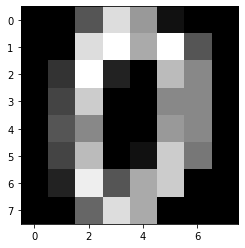

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.reshape(x[0], (8,8)), cmap=plt.cm.gray)
plt.show()

**แสดงผลในหมวดหมู่ (ตัวเลข) ที่ต่างกัน**

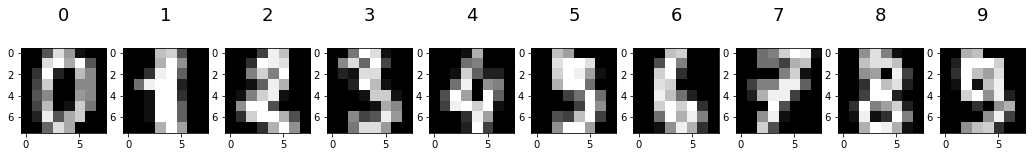

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,8))
for index, (image, label) in enumerate(zip(x[0:10], y[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('%i\n' % label, fontsize = 18)

**ลองเปลี่ยนสีเล่นได้เลยค่ะ**
*   ตรง cmap=plt.cm.`*gray*`
*   ตัวอย่างด้านล่างเปลี่ยนจาก gray เป็น viridis

> *สีที่เปลี่ยนได้ดูได้ใน https://matplotlib.org/stable/tutorials/colors/colormaps.html*




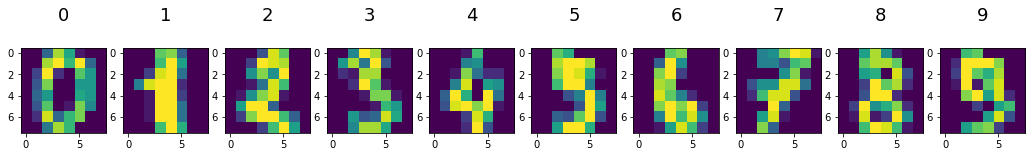

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,8))
for index, (image, label) in enumerate(zip(x[0:10], y[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.viridis)
    plt.title('%i\n' % label, fontsize = 18)



---
### เริ่ม Train & Test



---

จาก Library sklearn

* เรียกใช้งาน Logistic Regression (Algorithm สำหรับการ Classification) ใน Linear Model
* เรียกใช้งาน train / test split (การแบ่งข้อมูล train / test) ใน model selection


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**แบ่งข้อมูล**

*   กำหนดค่า test size เป็น 0.25
*   จะได้ข้อมูล train (สำหรับสร้างโมเดล) เป็นข้อมูล 75% ของข้อมูลทั้งหมด
*   จะได้ข้อมูล test (สำหรับทดสอบโมเดล) เป็นข้อมูล 25% ของข้อมูลทั้งหมด

* random_state คือ ค่า seed ที่กำหนดการ random กลุ่มข้อมูล จะเป็นเลขจำนวนเต็ม ถ้ากำหนดเลขเดิม ผลการ split ก็เหมือนเดิม











In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.25 , random_state=0 )

ดูขนาดของข้อมูล

> *การอ่าน shape ของ array ที่ได้ https://devjourneys.com/2020/11/03/%E0%B8%84%E0%B8%B3%E0%B8%AA%E0%B8%B1%E0%B9%88%E0%B8%87-shape-%E0%B9%83%E0%B8%99-numpy/*


In [34]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


**ใช้ Logistic Regression สร้างโมเดล**

*   กำหนดชื่อย่อของ LogisticRegression ในรูปตัวแปร
*   เทรนโมเดล



In [35]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()



---
### **วัดประสิทธิภาพของโมเดล**


---

*   จากการวัดค่าความแม่นยำ (Accuracy)




In [40]:
y_pred = LogReg.predict(x_test) 

score = LogReg.score(x_test, y_test)
score = round(score*100, 2)
print('Accuracy =', score)

Accuracy = 95.11




*   จากค่า Confusion Matrix


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

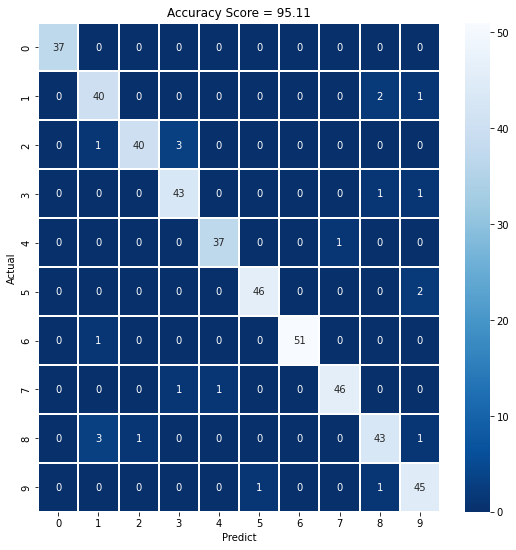

In [44]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predict');
figure_title = 'Accuracy Score = {0}'.format(score)
plt.title(figure_title, size = 12);